In [1]:
import qcodes as qc
from qdev_wrappers.fitting.least_squares_models import DecayingRabis, DecayT1
from qdev_wrappers.fitting.fitter import Fitter
from qdev_wrappers.fitting.plot_analysis_by_id import plot_analysis_by_id
from qcodes.dataset.plotting import plot_by_id

/anaconda3/envs/qcodes/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
from qcodes.dataset.data_export import get_data_by_id
from qcodes.dataset.measurements import Measurement

## Fitting by run id from saved dataset: 1D data

The Fitter takes a model, and optionally also a guess and an r2 limit for rejecting "fits" that fit the data very poorly. By default, the guess will be the found using the guess function of the model, and the r2 limit will be None.

The model includes information about the paramters to be fitted, their labels and units, a default initial guess for the parameters, and the specifics about the type of fit that the model uses. Information specific to the method of fitting is handeled by the model, not the fitter. 

Let's say we want to fit the following data, with run id 1, using a least squares fit:

([<matplotlib.axes._subplots.AxesSubplot at 0x113edb160>], [None])

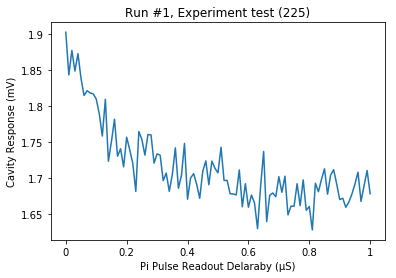

In [3]:
plot_by_id(1)

### Perform fit and see result

We will use the model *'DecayT1'* from the 'least squares' fitting models. Least squares fitting uses the scipy curve_fit function, and returns, in addition to fitted parameter values, a variance matrix.

In [4]:
model = DecayT1()

We can check the parameters and the function that will be used for fitting:

In [5]:
model.parameters

{'a': {'label': '$a$', 'unit': ''},
 'T': {'label': '$T$', 'unit': 's'},
 'c': {'label': '$c$', 'unit': ''}}

In [6]:
model.func_np 

'a*np.exp(-x/T)+c'

We initialize the fitter using the default guess method and no r2_limit:

In [7]:
fitter = Fitter(model)

To fit to an existing dataset, we run fitter.fit_by_id. This requires arguments:

run_id: id of the dataset to be fitted to
data_name: the name of the dependent variable you want to fit for.

It also needs at least one keyword argument telling it which part of the function is a variable, and what data to assign to that variable. In this instance we are using the function *a * np.exp(-x/T)+c*, and we want it to recognize *x* as a variable, and assign it the data array for 'pulse_readout_delay'.

If you are uncertain of the names of the variables in the data, they can be read in the data dictionary, or you can enter some random string and it will throw an error that gives you a list of all the data names in the data dictionary.

Running fit_by_id will return a 'fit' object.

In [8]:
fit = fitter.fit_by_id(1, 'data',  x='pulse_readout_delay')

inserting {'model': {'method': 'Least squares', 'function': {'func_str': '$f(x) = a \\exp(-x/T) + c$', 'func_np': 'a*np.exp(-x/T)+c'}, 'parameters': {'a': {'label': '$a$', 'unit': ''}, 'T': {'label': '$T$', 'unit': 's'}, 'c': {'label': '$c$', 'unit': ''}}}, 'inferred_from': {'run_id': 1, 'exp_id': 1, 'dept_var': 'data'}}

 Analysis saved with run id 246


By default *fit_by_id* will save the fit results. If you don't want it to do that, set *save_fit=False*.

In [9]:
fit = fitter.fit_by_id(1, 'data',  x='pulse_readout_delay', save_fit=False)

We can get the results as a dictionary, and/or plot them. The fit summary box next to the plot can be with or without information about the standard deviation on each parameter. Setting *save_plot=True* will save a pdf and png of the plot.

In [10]:
fit.get_result()

{'param_values': {'a': 0.00020686194829005843,
  'T': 1.7792117433091448e-07,
  'c': 0.0016790061428729915},
 'variance': {'a': 1.1218893660499864e-10,
  'T': 3.483289026855526e-16,
  'c': 1.6822488724253306e-11},
 'start_values': {'a': 0.00017795331091539001,
  'T': 2e-07,
  'c': 0.001690665726187212}}

([<matplotlib.axes._subplots.AxesSubplot at 0x11f7b95f8>], None)

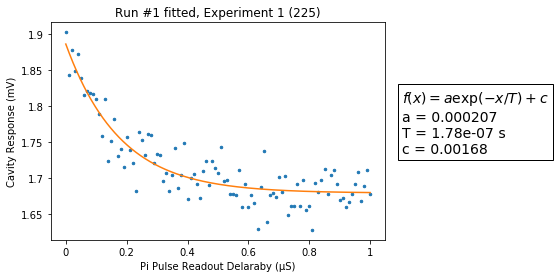

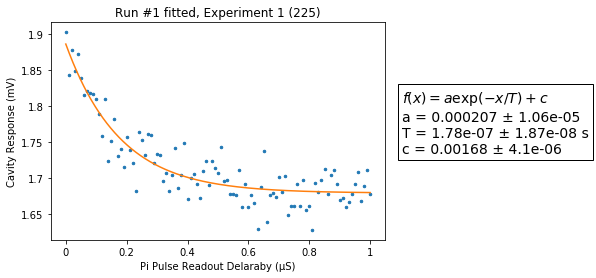

In [11]:
fit.plot()
fit.plot(show_variance=True, save_plot=True)

### Save analysis, and plot saved analysis from the experiment database

If you didn't allow fit_by_id to save the analysis automatically, you can save the fit result to our experiment database afterwards. This will create an 'analysis' run, with its own run id.

In [12]:
fit.save()

User schema at /Users/Lillian/qcodesrc_schema.json not found.User settings won't be validated


inserting {'model': {'method': 'Least squares', 'function': {'func_str': '$f(x) = a \\exp(-x/T) + c$', 'func_np': 'a*np.exp(-x/T)+c'}, 'parameters': {'a': {'label': '$a$', 'unit': ''}, 'T': {'label': '$T$', 'unit': 's'}, 'c': {'label': '$c$', 'unit': ''}}}, 'inferred_from': {'run_id': 1, 'exp_id': 1, 'dept_var': 'data'}}

 Analysis saved with run id 219


analysis #219@/Users/Lillian/experiments.db
-------------------------------------------
a - numeric
a_variance - numeric
a_start_values - numeric
T - numeric
T_variance - numeric
T_start_values - numeric
c - numeric
c_variance - numeric
c_start_values - numeric

We can also plot the saved analysis from the dataset later. It is not currently possible to show the variance on the plot from the saved analysis. 

By default, the plot is not saved by running *plot_analysis_by_id*, but setting *save_plot=True* will save the plot.

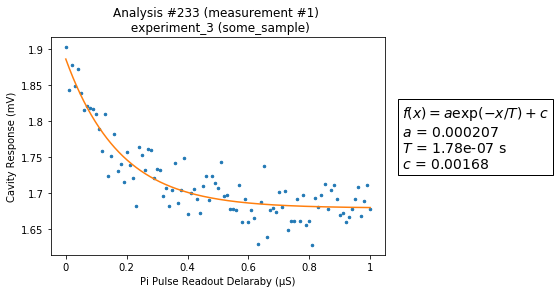

In [12]:
plot_analysis_by_id(233, save_plot=True)



## Fitting by run id from saved dataset: 2D data

Lets say we now want to fit the following 2D rabi measurement.

([<matplotlib.axes._subplots.AxesSubplot at 0x10f0ee588>],
 [<matplotlib.colorbar.Colorbar at 0x119c6ab38>])

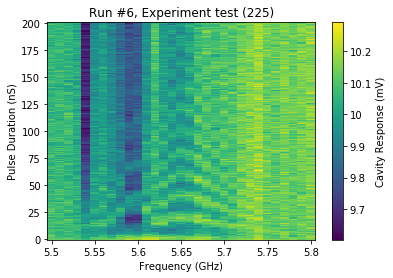

In [15]:
plot_by_id(6)

### Perform fit and see result

We will use the model *DecayingRabis()*. Initially, lets not set any criteria for the r2 limit. 

The fit is performed in the same way as it was for a 1D dataset. We can retrieve the fit results at a particular setpoint using *get_result*.

In [16]:
fitter = Fitter(DecayingRabis())
fit2 = fitter.fit_by_id(6, 'data', x='pulse_duration')

inserting {'model': {'method': 'Least squares', 'function': {'func_str': '$f(x) = a \\exp(-x/T) \\sin(\\omega x +\\phi) + c$', 'func_np': 'a*np.exp(-x/T)*np.sin(w*x+p)+c'}, 'parameters': {'a': {'label': '$a$', 'unit': ''}, 'T': {'label': '$T$', 'unit': 's'}, 'w': {'label': '$\\omega$', 'unit': 'Hz'}, 'p': {'label': '$\\phi$', 'unit': ''}, 'c': {'label': '$c$', 'unit': ''}}}, 'inferred_from': {'run_id': 6, 'exp_id': 1, 'dept_var': 'data'}}

 Analysis saved with run id 234


In [17]:
fit2.get_result(frequency=5.5e9)

{'param_values': {'a': 0.0005647538800030159,
  'T': 3.505714222730291e-08,
  'w': 1273021.6184877206,
  'p': 3.040156533555888,
  'c': 0.01005772038592006},
 'variance': {'a': 0.6130620896564186,
  'T': 2.0594564679445174e-14,
  'w': 3.1751885490918917e+18,
  'p': 20215.13264502227,
  'c': 2.0463646074653032e-10},
 'start_values': {'a': 0.00014999418615408051,
  'T': 1.00502512562814e-07,
  'w': 31258846.903218467,
  'p': 0,
  'c': 0.010063517863704075},
 'setpoints': {'frequency': 5500000000}}

The full dictionary of all fit results can also be accessed as follows (but is very long):

In [ ]:
fit2.fit_results

As before, we can plot the results by running *fit.plot()*. This will return a heatmap of the full fit, and a plot of each parameter vs. the setpoint. 

Least squares fitting includes variance on the parameters, and I'd like to see it, so I've set *show_variance=True*. 

Since I haven't asked it to, this will not save the plots.

([<matplotlib.axes._subplots.AxesSubplot at 0x10d89a668>,
 <matplotlib.colorbar.Colorbar at 0x11b556f98>)

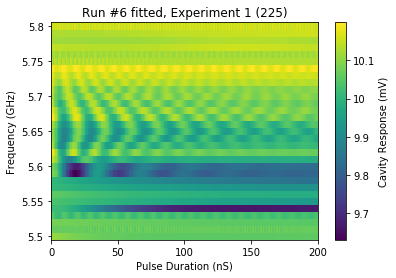

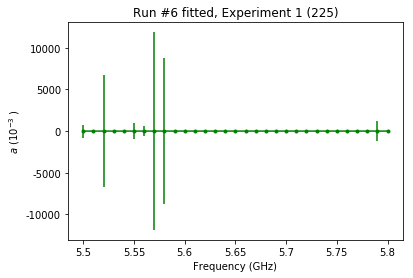

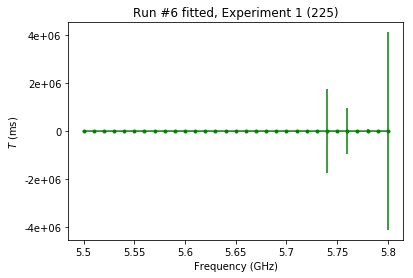

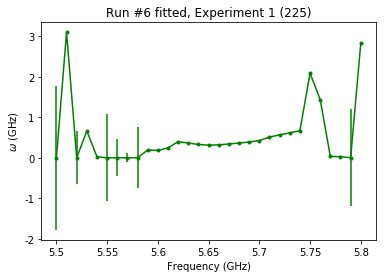

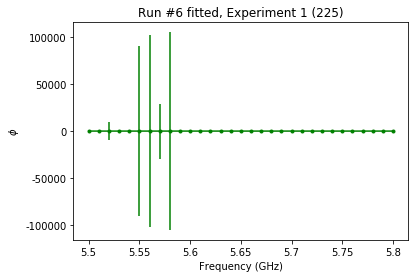

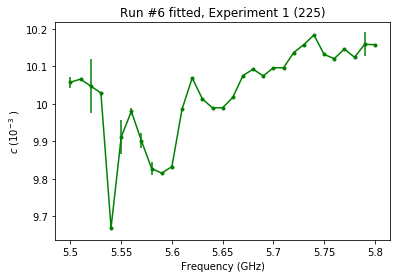

In [18]:
fit2.plot(show_variance=True)

Unsurprisingly, the fit is fine around the center of the scan, but not very good otherwise. To remove fits that differ greatly from the data, we can set an r2_limit for the fitter, and try again. This time, I will ask it to save the plot. If any of the fits are rejected by the r2 test, you will see a warning, to let you know that this has happened, at what the fitter r2 limit currently is.

In [20]:
fitter = Fitter(DecayingRabis(), r2_limit=0.5)
fit3 = fitter.fit_by_id(6, 'data', x='pulse_duration')

/Users/Lillian/qdev-wrappers/qdev_wrappers/fitting/fitter.py:127: UserWarning: Unsuccessful fit - r2 for fit is below limit 0.5
  warnings.warn(f'Unsuccessful fit - r2 for fit is below limit {self.r2_limit}')


inserting {'model': {'method': 'Least squares', 'function': {'func_str': '$f(x) = a \\exp(-x/T) \\sin(\\omega x +\\phi) + c$', 'func_np': 'a*np.exp(-x/T)*np.sin(w*x+p)+c'}, 'parameters': {'a': {'label': '$a$', 'unit': ''}, 'T': {'label': '$T$', 'unit': 's'}, 'w': {'label': '$\\omega$', 'unit': 'Hz'}, 'p': {'label': '$\\phi$', 'unit': ''}, 'c': {'label': '$c$', 'unit': ''}}, 'r2_limit': 0.5}, 'inferred_from': {'run_id': 6, 'exp_id': 1, 'dept_var': 'data'}}

 Analysis saved with run id 235


([<matplotlib.axes._subplots.AxesSubplot at 0x119fe05f8>,
 <matplotlib.colorbar.Colorbar at 0x11a8d5470>)

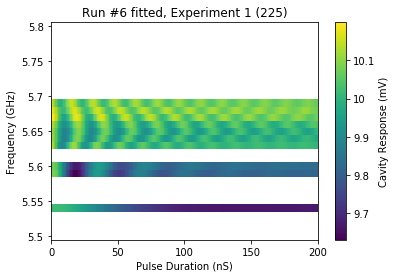

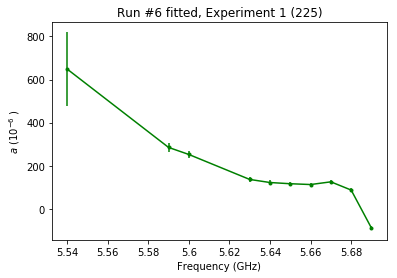

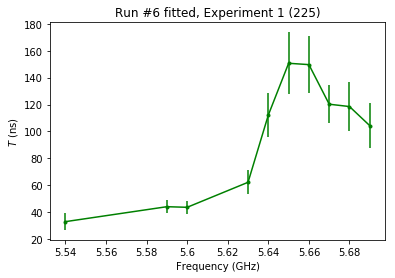

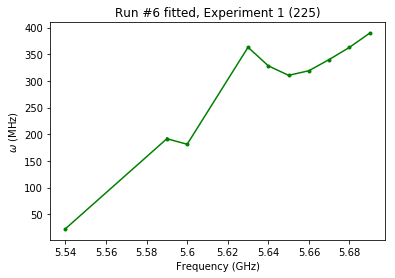

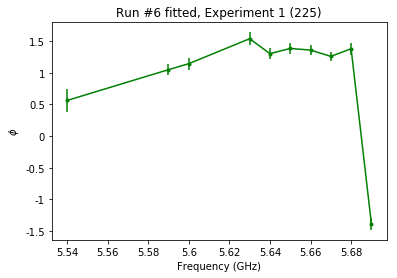

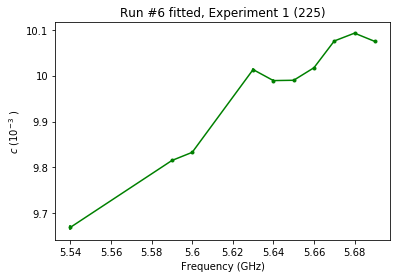

In [21]:
fit3.plot(show_variance=True, save_plot=True)

If we try to retrieve the fit result at 5.5 GHz that we looked at before, we can see it has now been rejected due to the r2 limit:

In [22]:
fit3.get_result(frequency=5.5e9)

{'param_values': None, 'setpoints': {'frequency': 5500000000}}

### Save analysis, and plot saved analysis from the experiment database

If we hadn't allowed it to save the result when running fit_by_id, we might want to save the fit later. Again we can run *fit.save()* in that case. 

In [ ]:
fit3.save()

For 2D data, plotting options are a bit different, depending on whether you plot the results of the fit object (above), or plot from a saved analysis. To plot from a saved dataset, we use the same function we did above for the 1D dataset: *plot_analysis_by_id*. As for the 1D fits, with *plot_analysis_by_id* you can choose to set *save_plot=True* to save the plots.

Plotting from a saved fit will not return a heatmap, but can plot cuts of the data (by specifying the setpoint for the cut). Plotting from a saved dataset also can't currently retrieve the variance information from the database, so it does not have the option to make plots including variance.

Just running *plot_analysis_by_id(run_id)* for the analysis is similar to the plot above from plotting the 'fit' object, but without the heatmap and without variance. 

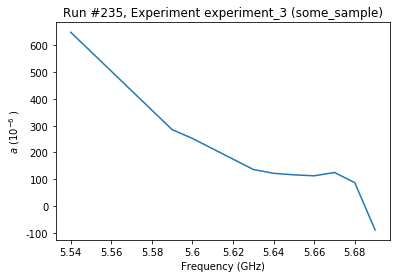

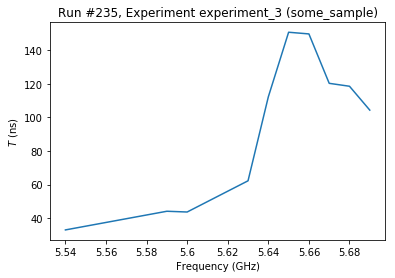

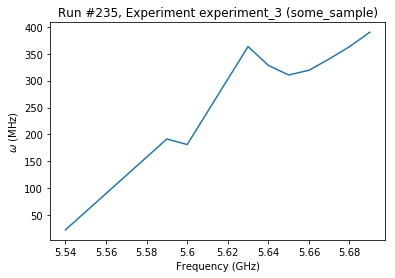

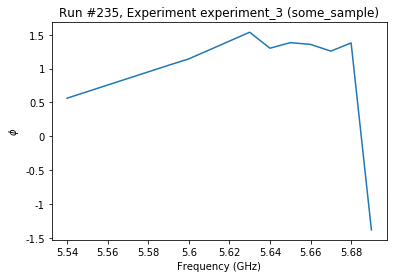

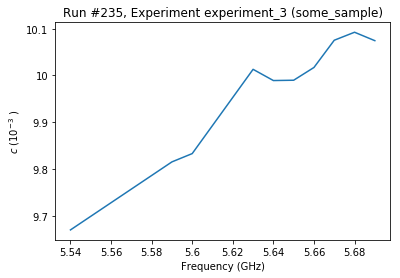

In [23]:
plot_analysis_by_id(235, save_plot=True)

Specifying the setpoint you want to see the fit at plots a cut with the fit and data at that point.

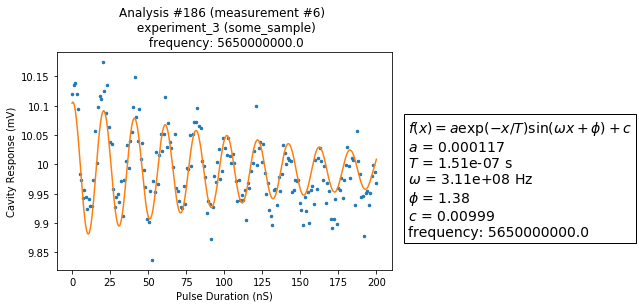

In [5]:
plot_analysis_by_id(186, frequency=5.65e9, save_plot=True)